# Exemplo processamento de dados com Python

Os dados do [Portal de Dados Abertos do BNDES](https://dadosabertos.bndes.gov.br) estão arquivos CSV em formato fácil de processar. Este Notebook:
1. baixa um conjunto de dados
2. carrega-o em um DataFrame Python
3. exibe um gráfico

In [1]:
# bibliotecas externas estão no arquivo requirements.txt
import requests
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#O URL está sempre no topo da página de cada recurso.
def download_bndes(url_csv):
    Path('dados').mkdir(exist_ok=True)
    arq = Path('dados') / url_csv.split('/')[-1]

    content = None
    if not arq.exists():
        # baixa arquivo
        dados = requests.get(url_csv)
        dados.raise_for_status()
        content = dados.content
        with arq.open('wb') as f:
            f.write(content)
    else:
        print(f"Arquivo já existe, para forçar download apague o arquivo {arq} e tente de novo")

    return arq    

In [3]:
url_participacoes = 'https://dadosabertos.bndes.gov.br/dataset/68a85772-df73-4c8b-8b8c-398f494fcca8/resource/10ff2d60-02d1-4619-8e42-24fc2a5927dd/download/renda-variavel-participacoes-acionarias-historico-da-carteira.csv'
arq_dados = download_bndes(url_participacoes)

Arquivo já existe, para forçar download apague o arquivo dados\renda-variavel-participacoes-acionarias-historico-da-carteira.csv e tente de novo


## Carrega arquivo para Dataframe

Todos os dados do Portal de Dados Abertos do BNDES têm o mesmo formato e podem ser lidos com o comando abaixo. Arquivos foram gerados para serem facilmente coompreendidos pelas ferramentas padrão.

Os nomes de colunas estão em minúsculas e não tem espaços, acentos ou caracteres especiais, para que sejam fáceis de trabalhar.

In [4]:
df = pd.read_csv(arq_dados, sep=';', decimal=',', encoding='UTF-8')
df.head()

,sigla,razao_social,cnpj,tipo_de_ativo,ano,setor_de_atividade,total_pp,on_pp,pn_pp,aberta_fechada,acordo_de_acionistas_em_vigor,indicado_para_conselho_de_administracao,indicado_para_conselho_fiscal
0,ABICO,ABICO - CIA. DE INVESTIMENTOS ÁRABE E BRASILEIRO,42.470.443/0001-96,PARTICIPAÇÃO ACIONÁRIA,2021,OUTROS SETORES,35.0,35.0,0.0,FECHADA,NÃO,NÃO,NÃO
1,ABICO,ABICO - CIA. DE INVESTIMENTOS ÁRABE E BRASILEIRO,42.470.443/0001-96,PARTICIPAÇÃO ACIONÁRIA,2020,OUTROS SETORES,35.0,35.0,0.0,FECHADA,NÃO,NÃO,NÃO
2,ABICO,ABICO - CIA. DE INVESTIMENTOS ÁRABE E BRASILEIRO,42.470.443/0001-96,PARTICIPAÇÃO ACIONÁRIA,2019,OUTROS SETORES,35.0,35.0,0.0,FECHADA,NÃO,NÃO,NÃO
3,ABICO,ABICO - CIA. DE INVESTIMENTOS ÁRABE E BRASILEIRO,42.470.443/0001-96,PARTICIPAÇÃO ACIONÁRIA,2018,OUTROS SETORES,35.0,35.0,0.0,FECHADA,NÃO,NÃO,NÃO
4,ABICO,ABICO - CIA. DE INVESTIMENTOS ÁRABE E BRASILEIRO,42.470.443/0001-96,PARTICIPAÇÃO ACIONÁRIA,2017,OUTROS SETORES,35.0,35.0,0.0,FECHADA,NÃO,NÃO,NÃO


As colunas já devem ser carregadas com o tipo correto. Não sendo necessário perder tempo convertendo os dados. 

Dica: em Python, caso haja colunas com datas, use o parâmetro `parse_dates=['nome_col'])`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   sigla                                    2065 non-null   object 
 1   razao_social                             2065 non-null   object 
 2   cnpj                                     2064 non-null   object 
 3   tipo_de_ativo                            2065 non-null   object 
 4   ano                                      2065 non-null   int64  
 5   setor_de_atividade                       2061 non-null   object 
 6   total_pp                                 2042 non-null   float64
 7   on_pp                                    2042 non-null   float64
 8   pn_pp                                    2042 non-null   float64
 9   aberta_fechada                           2064 non-null   object 
 10  acordo_de_acionistas_em_vigor            2065 no

Agora é só trabalhar com os dados, por exemplo, contando quantas participações acionárias o BNDES tem em empresas.

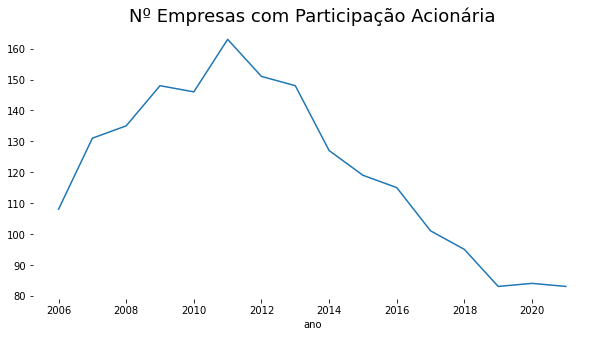

In [6]:
df_num_empresas = df[df.total_pp > 0].groupby('ano')['cnpj'].count()
ax = df_num_empresas.plot.line()
ax.set_title('Nº Empresas com Participação Acionária', fontsize=18);
plt.gcf().set_size_inches(10, 5)
plt.box(False);